# Best Neighborhood


## Metric: Population Density 

We all know our friendly neighborhood Spider-Man but he can't work if there's no one for him to help or if there's too many people for him to help at the same time. That is why my metric is on the population of each neighborhood to accurately reflect which neighborhood Spider-Man would be most comfortable in. 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Dataset for Area and Size of the Neighborhoods

url2 = "https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff"
area = pd.read_csv(url2)

In [3]:
#Dataset for Population 

url3 = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv"
population = pd.read_csv(url3)

In [4]:
#Find out what data is in the datasets

for population_data in population:
    print(population_data)

Neighborhood
Id
Estimate; Total
Margin of Error; Total


In [5]:
for neighborhood in area:
    print(neighborhood)

objectid
fid_blockg
statefp10
countyfp10
tractce10
blkgrpce10
geoid10
namelsad10
mtfcc10
funcstat10
aland10
awater10
intptlat10
intptlon10
shape_leng
fid_neighb
area
perimeter
neighbor
neighbor_i
hood
hood_no
acres
sqmiles
dpwdiv
unique_id
sectors
shape_le_1
shape_ar_1
page_number
plannerassign
created_user
created_date
last_edited_user
last_edited_date
temp
shape_area
shape_length


In [6]:
#Create two new datasets by taking only the Population and Area of the Neighborhoods

populationNew = pd.DataFrame(population,columns=['Neighborhood','Estimate; Total'])
populationNew.rename(columns = {'Estimate; Total':'Population'}, inplace = True)
print(populationNew)

           Neighborhood  Population
0      Allegheny Center      1411.0
1        Allegheny West       343.0
2             Allentown      2558.0
3             Arlington      1852.0
4     Arlington Heights       272.0
..                  ...         ...
86  Upper Lawrenceville      2754.0
87             West End       235.0
88         West Oakland      1717.0
89             Westwood      3537.0
90              Windgap      1534.0

[91 rows x 2 columns]


In [7]:
pittNeighborhoods = pd.DataFrame(area, columns = ['hood', 'area'])

#Dividing the Area by 1000000 in order to make the units square meters
pittNeighborhoods['area'] = (pittNeighborhoods['area']/10000000).round(5)
print(pittNeighborhoods)


                     hood     area
0                 Chateau  1.06883
1             Summer Hill  1.22320
2       Northview Heights  0.87396
3   Spring Hill-City View  1.75506
4             Perry South  2.52206
..                    ...      ...
85              Overbrook  2.33934
86         Chartiers City  0.36836
87                 Esplen  0.64099
88              Ridgemont  1.02789
89               West End  0.55795

[90 rows x 2 columns]


In [8]:
#Renaming the Columns in order to merge the two datasets together

pittNeighborhoods.rename(columns = {'hood':'Neighborhood', 'area':'Area'}, inplace = True)
finalPop = pd.merge(pittNeighborhoods, populationNew)


In [9]:
#Find the Population Density by dividing the population by the area

finalPop['Density'] = (finalPop['Population']/finalPop['Area']).round(5)
print(finalPop)

             Neighborhood     Area  Population     Density
0                 Chateau  1.06883         3.0     2.80681
1             Summer Hill  1.22320      1191.0   973.67560
2       Northview Heights  0.87396      1545.0  1767.81546
3   Spring Hill-City View  1.75506      2456.0  1399.38236
4             Perry South  2.52206      3398.0  1347.31132
..                    ...      ...         ...         ...
85              Overbrook  2.33934      3682.0  1573.94821
86         Chartiers City  0.36836       560.0  1520.25193
87                 Esplen  0.64099       309.0   482.06680
88              Ridgemont  1.02789       314.0   305.48016
89               West End  0.55795       235.0   421.18469

[90 rows x 4 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 90 Text major ticklabel objects>)

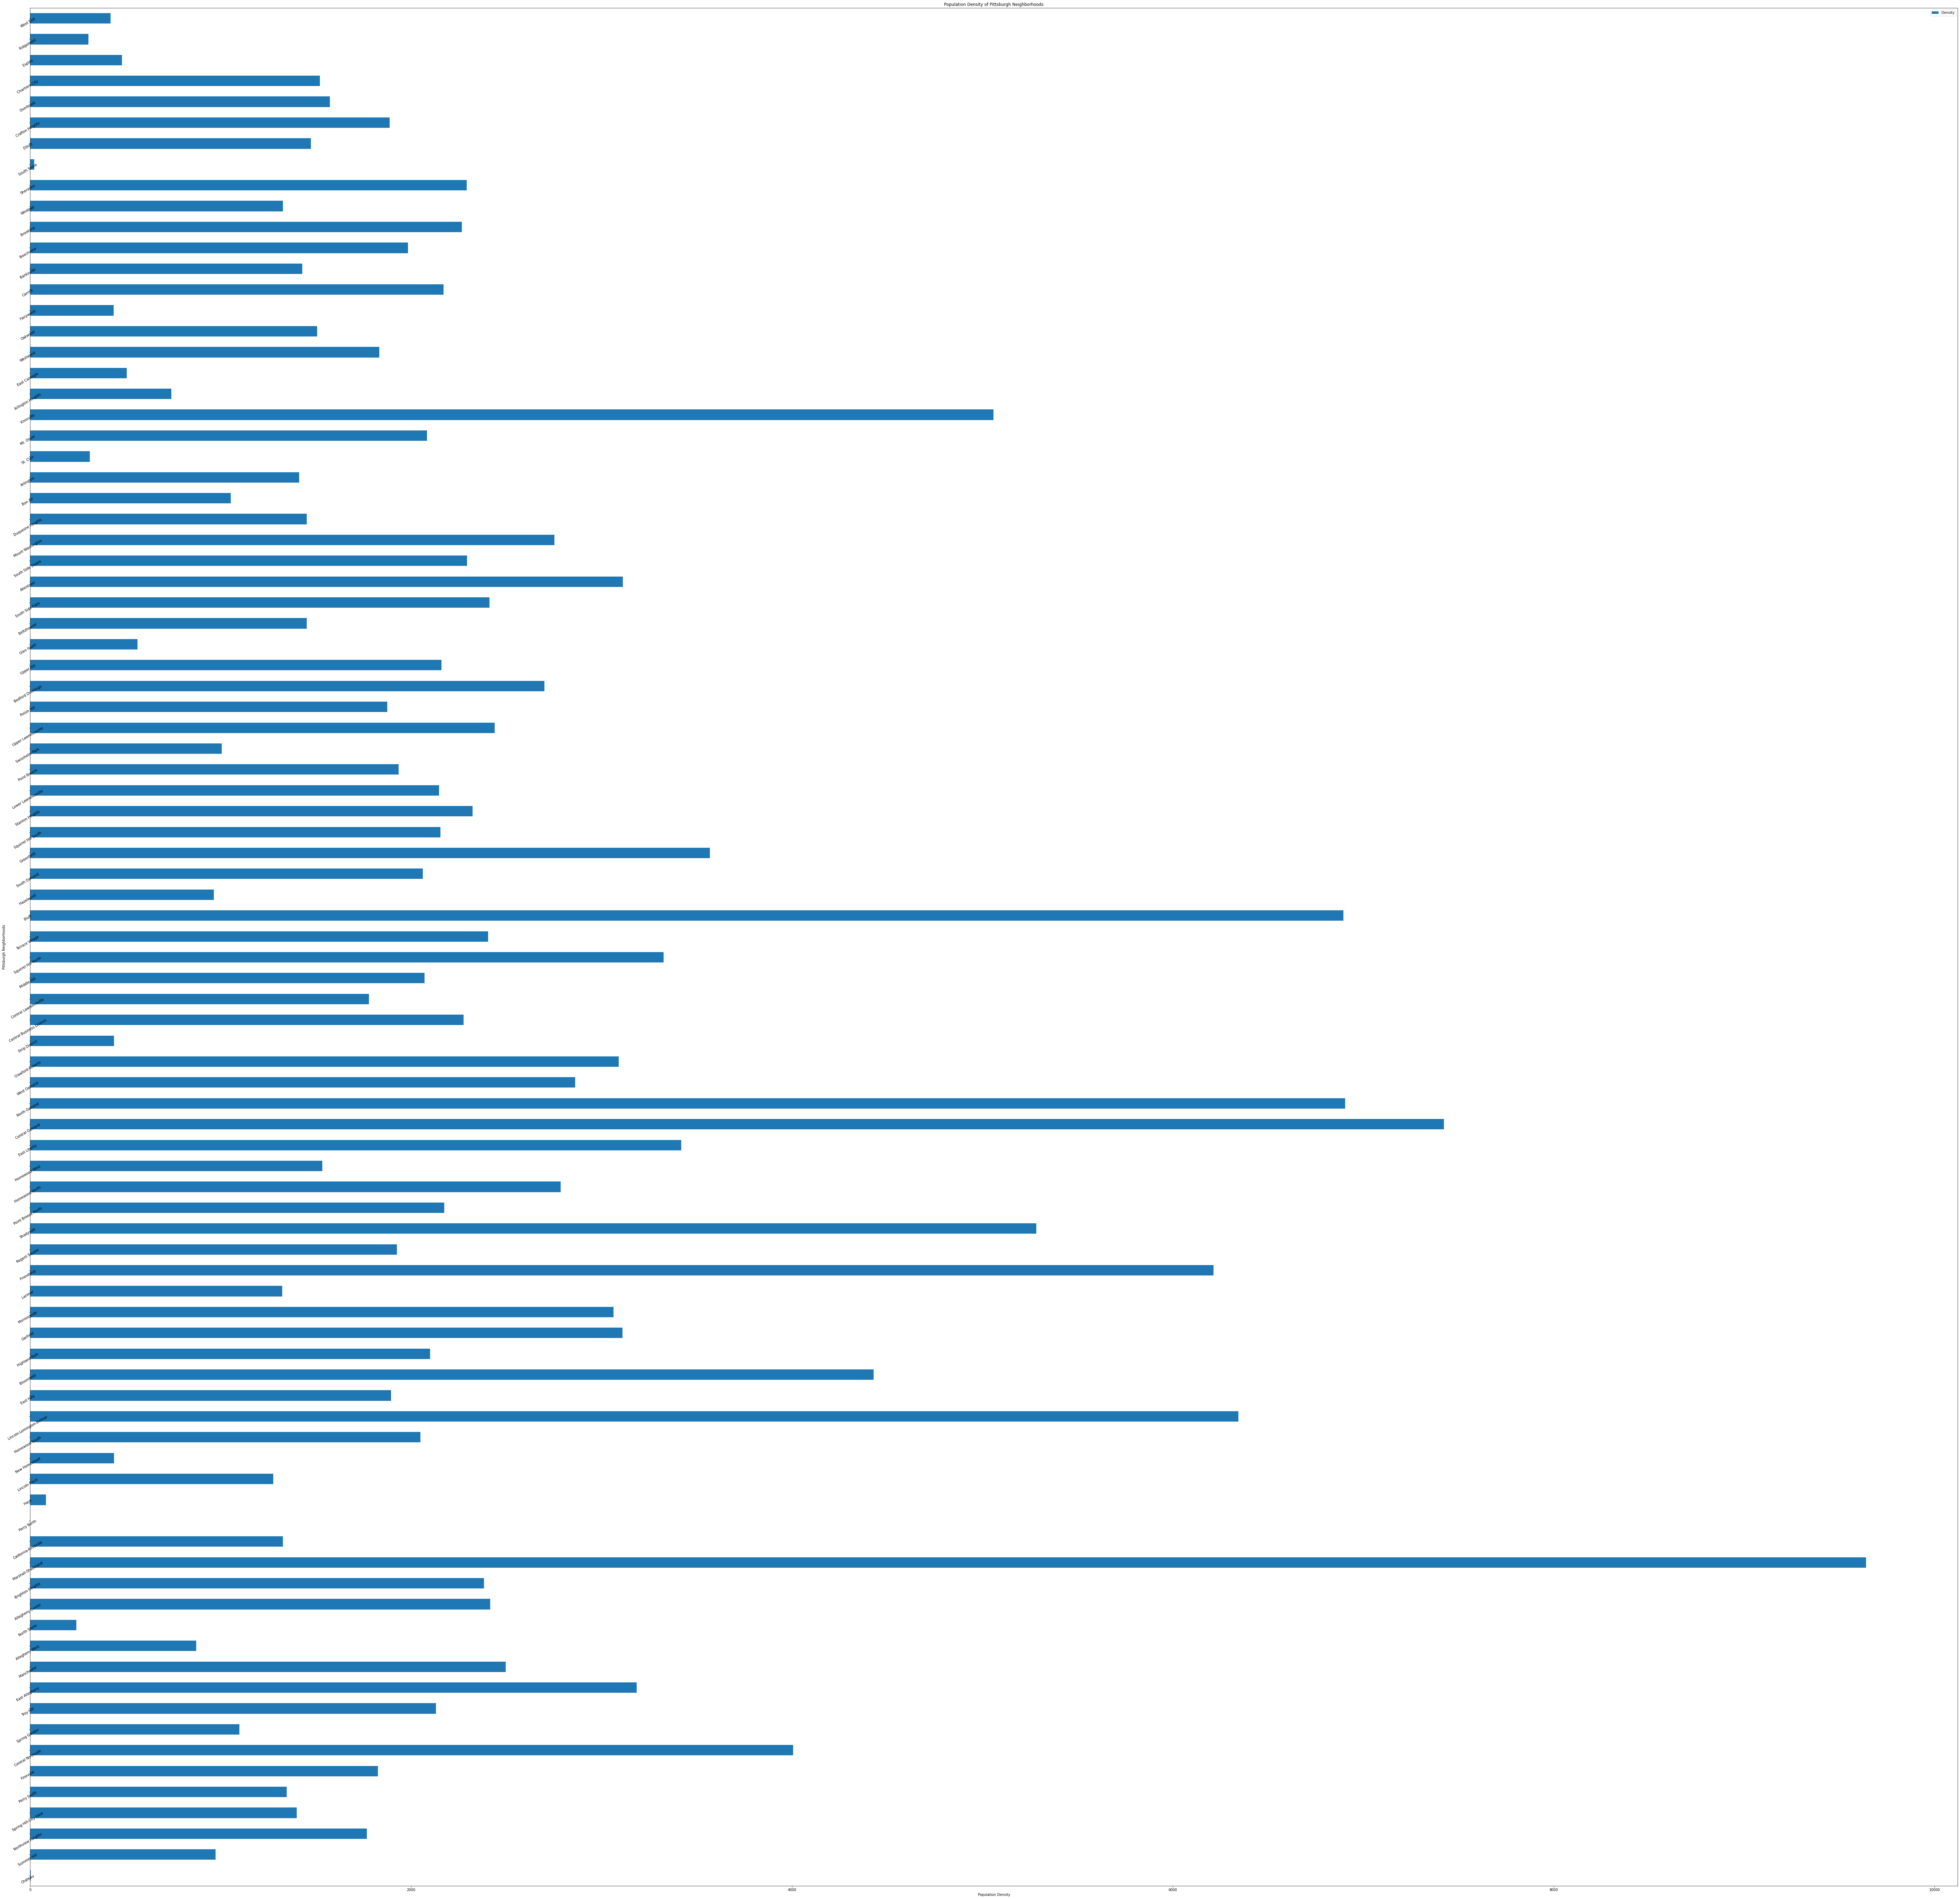

In [10]:
#Graphing the dataset by Density

finalPop.plot.barh(x = 'Neighborhood', y = 'Density', figsize = (100,100))
plt.title("Population Density of Pittsburgh Neighborhoods") 
plt.xlabel("Population Density")
plt.ylabel("Pittsburgh Neighborhoods")
plt.yticks(rotation=30, horizontalalignment="center")

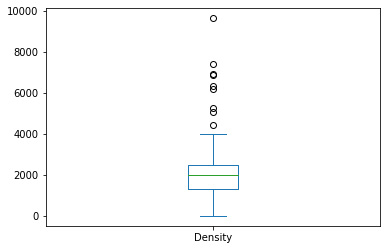

In [28]:
#Creating a box plot in order to find the average population density among the neighborhoods

finalPop.plot.box(y = 'Density')

In [42]:
#Finding out the median and upper and lower quartiles of the box plot

median = finalPop['Density'].median()
print(median)

q1 = finalPop['Density'].quantile(q = 0.25)
print(q1)

q3 = finalPop['Density'].quantile(q = 0.75)
print(q3)

1984.44966
1326.62239
2496.78911


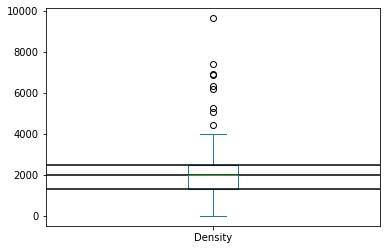

In [43]:
#Lines to show the upper and lower quartile and the median

finalPop.plot.box(y = 'Density')
plt.axhline(median, color='k')
plt.axhline(q1, color='k')
plt.axhline(q3, color='k')

In [13]:
#Filtering Dataset to find a neighborhood closest to the median

realFinal = finalPop[finalPop['Density'] <=2500]
srsFinal = realFinal[realFinal['Density']>=1300]

In [14]:
print(srsFinal)

                 Neighborhood     Area  Population     Density
2           Northview Heights  0.87396      1545.0  1767.81546
3       Spring Hill-City View  1.75506      2456.0  1399.38236
4                 Perry South  2.52206      3398.0  1347.31132
5                    Fineview  0.69588      1270.0  1825.02730
8                   Troy Hill  1.07173      2283.0  2130.20070
10                 Manchester  0.77860      1944.0  2496.78911
13           Allegheny Center  0.58407      1411.0  2415.80632
14           Brighton Heights  3.11439      7421.0  2382.81012
16       California-Kirkbride  0.60510       803.0  1327.05338
21             Homewood South  1.11042      2276.0  2049.67490
23                 East Hills  1.50926      2859.0  1894.30582
25              Highland Park  3.24199      6810.0  2100.56169
28                    Larimer  1.24079      1641.0  1322.54451
30              Regent Square  0.53629      1033.0  1926.19665
32         Point Breeze North  0.79688      1732.0  217

In [15]:
thinkFinal = realFinal[realFinal['Density']>= 1900]
notFinal = thinkFinal[thinkFinal['Density']<=2100]
print(notFinal)

      Neighborhood     Area  Population     Density
21  Homewood South  1.11042      2276.0  2049.67490
30   Regent Square  0.53629      1033.0  1926.19665
43     Middle Hill  0.85032      1760.0  2069.80901
48   South Oakland  1.41697      2921.0  2061.44096
53    Point Breeze  2.79973      5414.0  1933.75790
69      Mt. Oliver  0.28715       598.0  2082.53526
78       Beechview  4.07065      8078.0  1984.44966


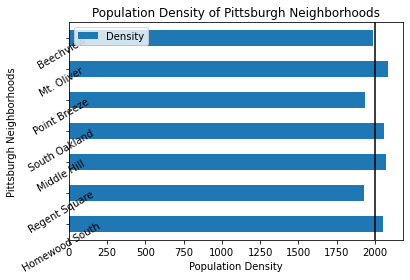

In [16]:


notFinal.plot.barh(x = 'Neighborhood', y = 'Density')
plt.title("Population Density of Pittsburgh Neighborhoods") 
plt.xlabel("Population Density")
plt.ylabel("Pittsburgh Neighborhoods")
plt.yticks(rotation=30, horizontalalignment="center")
plt.axvline(x = 2000, color = 'k')

The closest to the median is Beechview

In [26]:
#Finding the average of all of the population densities

average = finalPop['Density'].mean()
print(average)

2241.467743707866


In [25]:
#Filtering neighborhoods closest to the average

averageFinal = finalPop[finalPop['Density'] <= 2300]
averFinal = averageFinal[averageFinal['Density']>=2200]

print(averFinal)

                 Neighborhood     Area  Population     Density
41  Central Business District  1.78467      4060.0  2274.93038
63          South Side Slopes  1.99730      4583.0  2294.59771
79                  Brookline  5.80447     13160.0  2267.21820
81                   Sheraden  2.48074      5684.0  2291.25180


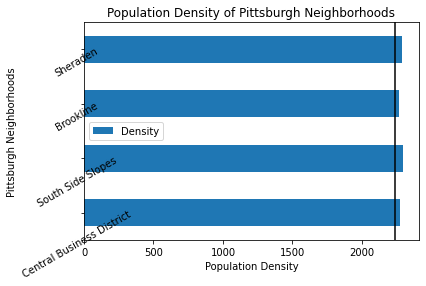

In [27]:
averFinal.plot.barh(x = 'Neighborhood', y = 'Density')
plt.title("Population Density of Pittsburgh Neighborhoods") 
plt.xlabel("Population Density")
plt.ylabel("Pittsburgh Neighborhoods")
plt.yticks(rotation=30, horizontalalignment="center")
plt.axvline(x = average, color = 'k')

Brookline is the closest population density to the average.